[@LorenaABarba](https://twitter.com/LorenaABarba)

> (La cellule ci-dessous exécute le style de ce bloc-note.)

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

***12 étapes vers Navier–Stokes***
======
***

Avez-vous expérimenté les étapes [1](./01_FR_Step_1.ipynb) et [2](./02_FR_Step_2.ipynb) en utilisant différents choix de paramètres ? Si vous l'avez fait, vous avez probablement rencontré un comportement inattendu. Votre solution a-t-elle déjà explosé ? (D'après mon expérience, les étudiants en CFD *adorent* faire exploser les choses.)

Vous vous demandez probablement pourquoi la modification des paramètres de discrétisation affecte votre solution de manière si drastique. Ce note-book complète nos [leçons CFD interactives](https://github.com/barbagroup/CFDPython) en discutant de la condition CFL. Et apprenez-en plus en regardant les conférences YouTube du professeur Barba (liens ci-dessous).

Convergence et condition CFL
----
***

In [1]:
import numpy                 #numpy is a library for array operations akin to MATLAB
from matplotlib import pyplot    #matplotlib is 2D plotting library
%matplotlib inline

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    dt = .025  #dt is the amount of time each timestep covers (delta t)
    c = 1

    u = numpy.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u[int(.5/dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

    un = numpy.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u);

Pour les premières étapes, nous avons utilisé les mêmes conditions générales initiales et aux limites. Avec les paramètres que nous avons initialement proposés, la grille comporte 41 points et le pas de temps est de 0,25 seconde. Maintenant, nous allons expérimenter l'augmentation de la taille de notre grille. Le code ci-dessous est identique au code que nous avons utilisé dans [Step 1](./01_Step_1.ipynb), mais ici, il a été regroupé dans une fonction afin que nous puissions facilement examiner ce qui se passe lorsque nous ajustons une seule variable : ** la taille de la grille**.


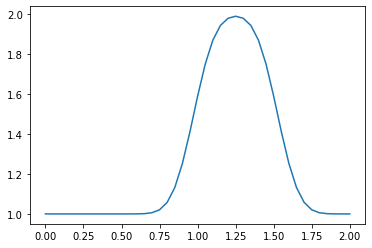

In [2]:
linearconv(41) #convection using 41 grid points

Examinons maintenant les résultats de notre problème de convection linéaire avec un maillage de plus en plus fin.


Il s'agit du même résultat que notre calcul de l'étape 1, reproduit ici à titre de référence.



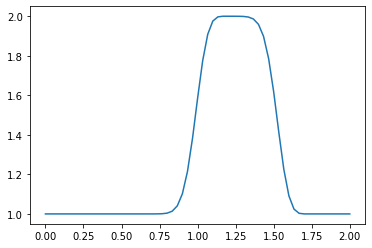

In [3]:
linearconv(61)

Ici, la diffusion numérique est toujours présente, mais elle est moins sévère.



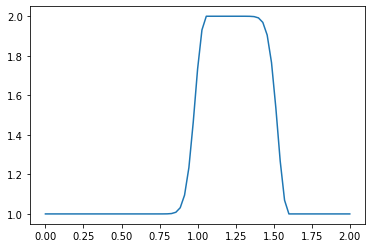

In [4]:
linearconv(71)

Ici, le même schéma est présent - la vague est plus carrée que dans les passages précédents.



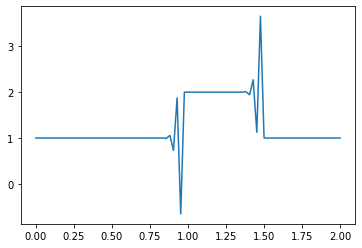

In [5]:
linearconv(85)

Cela ne ressemble en rien à notre fonction de chapeau d'origine.

### Que s'est-il passé?



Pour répondre à cette question, nous devons réfléchir un peu à ce que nous implémentons réellement dans le code.

À chaque itération de notre boucle temporelle, nous utilisons les données existantes sur notre onde pour estimer la vitesse de l'onde au pas de temps suivant. Initialement, l'augmentation du nombre de points de grille a donné des réponses plus précises. Il y avait moins de diffusion numérique et l'onde carrée ressemblait beaucoup plus à une onde carrée que dans notre premier exemple.

Chaque itération de notre boucle temporelle couvre un pas de temps de longueur $\Delta t$, que nous avons défini comme 0,025

Au cours de cette itération, nous évaluons la vitesse de l'onde à chacun des points $x$ que nous avons créés. Dans la dernière intrigue, quelque chose a clairement mal tourné.

Ce qui s'est passé, c'est que sur la période de temps $\Delta t$, l'onde parcourt une distance supérieure à `dx`. La longueur `dx` de chaque case de la grille est liée au nombre total de points `nx`, de sorte que la stabilité peut être appliquée si la taille du pas $\Delta t$ est calculée par rapport à la taille de `dx`.

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\max}$$

où $u$ est la vitesse de l'onde ; $\sigma$ est appelé le **nombre de Courant** et la valeur de $\sigma_{\max}$ qui assurera la stabilité dépend de la discrétisation utilisée.

Dans une nouvelle version de notre code, nous utiliserons le nombre CFL pour calculer le pas de temps approprié `dt` en fonction de la taille de `dx`.


In [6]:
import numpy
from matplotlib import pyplot

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    c = 1
    sigma = .5
    
    dt = sigma * dx

    u = numpy.ones(nx) 
    u[int(.5/dx):int(1 / dx + 1)] = 2

    un = numpy.ones(nx)

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u)

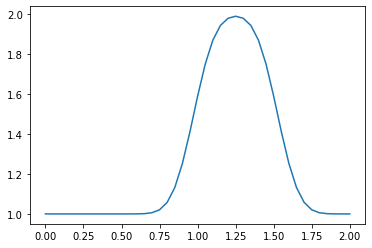

In [7]:
linearconv(41)

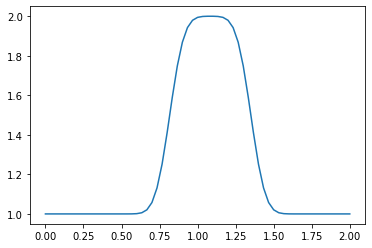

In [8]:
linearconv(61)

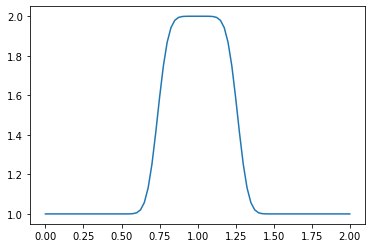

In [9]:
linearconv(81)

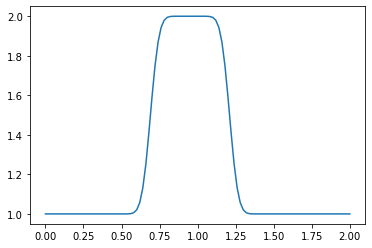

In [10]:
linearconv(101)

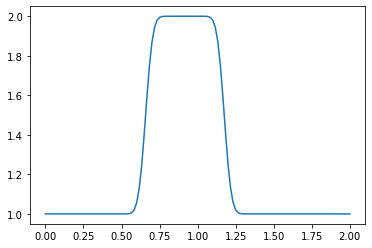

In [11]:
linearconv(121)

Notez que lorsque le nombre de points "nx" augmente, l'onde convecte sur une distance de plus en plus courte. Le nombre d'itérations temporelles auxquelles nous avons avancé la solution est maintenu constant à `nt = 20`, mais en fonction de la valeur de `nx` et des valeurs correspondantes de `dx` et `dt`, une fenêtre temporelle plus courte est examinée globalement.



Learn More
-----
***

Il est possible de faire une analyse rigoureuse de la stabilité des schémas numériques, dans certains cas. Regardez la présentation du professeur Barba sur ce sujet dans **Leçon 9** sur You Tube.



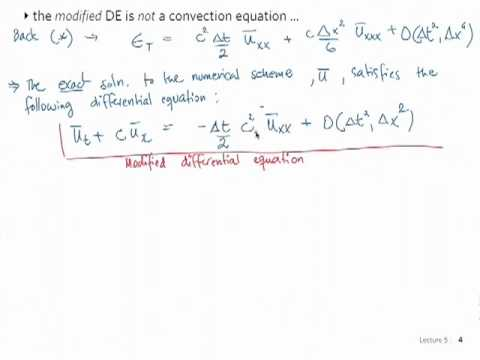

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('Yw1YPBupZxU')